In [1]:
import numpy as np
import pandas as pd
import json
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.api import qqplot

from sklearn.datasets import load_digits

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import skew, boxcox, shapiro, normaltest, kstest
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

## Problem Statement

## Data Gathering

In [3]:
laptop_df = pd.read_csv(r'C:\Users\ramma\OneDrive\My_Data\Velocity_Data_Science\Project\Laptop_Price_Predictor\csv_files\laptop_data.csv')
df = laptop_df.drop(columns=['Unnamed: 0'])
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
423,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Linux,2.3kg,31808.16
648,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,64628.64
287,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg,52054.56
1071,HP,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.31kg,63882.72
1248,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,2.3kg,30529.44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [5]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [6]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## EDA / Feature Engg / Feature Selection

In [7]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<AxesSubplot: >

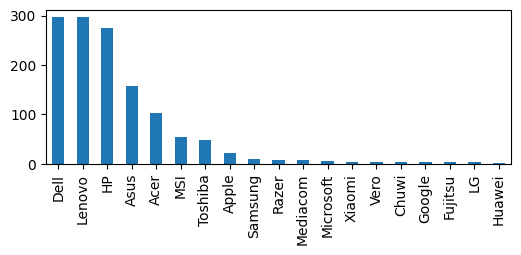

In [8]:
plt.figure(figsize=(6,2))
df['Company'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

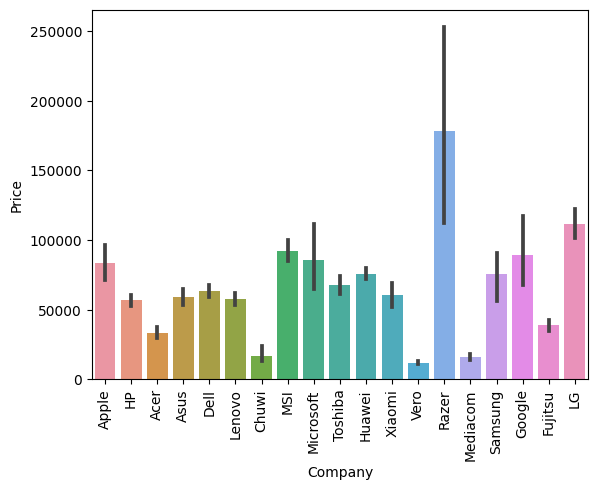

In [9]:
sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')

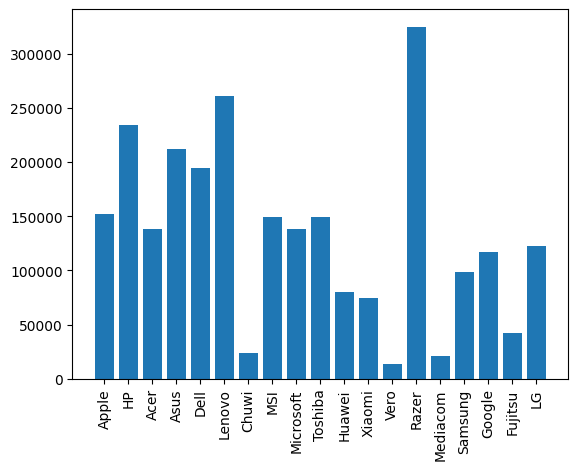

In [10]:
plt.bar(df['Company'], height=df['Price'])
plt.tick_params("x",labelrotation=90)

In [11]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

<AxesSubplot: >

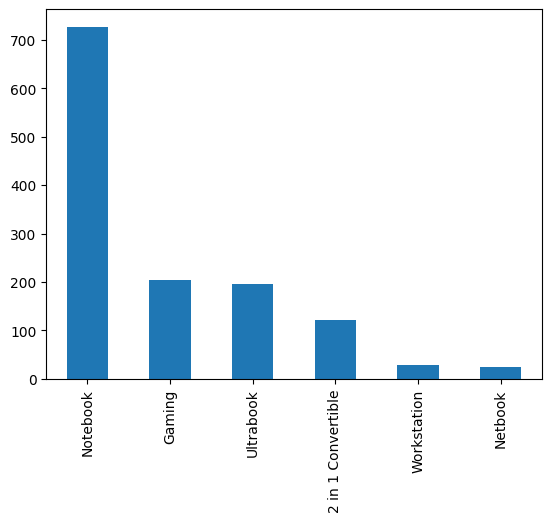

In [12]:
df['TypeName'].value_counts().plot(kind = 'bar')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

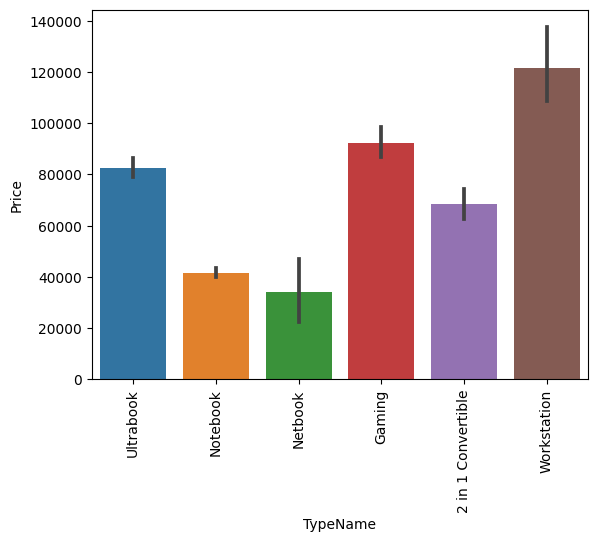

In [13]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Acer'),
  Text(1, 0, 'Apple'),
  Text(2, 0, 'Asus'),
  Text(3, 0, 'Chuwi'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Fujitsu'),
  Text(6, 0, 'Google'),
  Text(7, 0, 'HP'),
  Text(8, 0, 'Huawei'),
  Text(9, 0, 'LG'),
  Text(10, 0, 'Lenovo'),
  Text(11, 0, 'MSI'),
  Text(12, 0, 'Mediacom'),
  Text(13, 0, 'Microsoft'),
  Text(14, 0, 'Razer'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Toshiba'),
  Text(17, 0, 'Vero'),
  Text(18, 0, 'Xiaomi')])

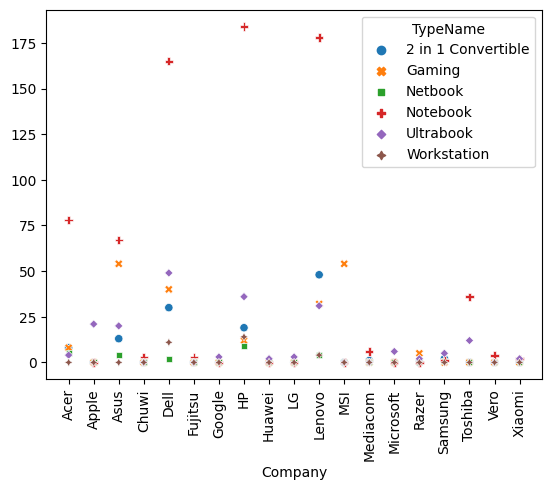

In [14]:
sns.scatterplot(pd.crosstab(df['Company'], df['TypeName']))
plt.xticks(rotation='vertical')

In [15]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [16]:
df['Inches'].mean()

15.017191097467379

In [17]:
df['Inches'].max()

18.4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '10.1'),
  Text(1, 0, '11.3'),
  Text(2, 0, '11.6'),
  Text(3, 0, '12.0'),
  Text(4, 0, '12.3'),
  Text(5, 0, '12.5'),
  Text(6, 0, '13.0'),
  Text(7, 0, '13.3'),
  Text(8, 0, '13.5'),
  Text(9, 0, '13.9'),
  Text(10, 0, '14.0'),
  Text(11, 0, '14.1'),
  Text(12, 0, '15.0'),
  Text(13, 0, '15.4'),
  Text(14, 0, '15.6'),
  Text(15, 0, '17.0'),
  Text(16, 0, '17.3'),
  Text(17, 0, '18.4')])

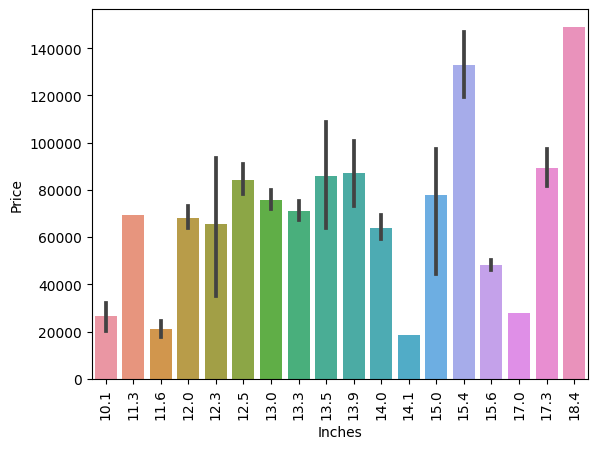

In [18]:
sns.barplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation='vertical')

<AxesSubplot: xlabel='Inches'>

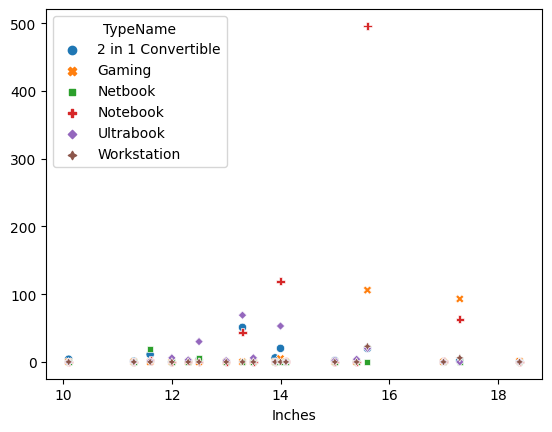

In [19]:
sns.scatterplot(pd.crosstab(df['Inches'], df['TypeName']))

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [21]:
df['ScreenResolution'].sample(10)

670                             Touchscreen 2256x1504
67                                           1366x768
790                                 Full HD 1920x1080
183                                          1366x768
179     IPS Panel 4K Ultra HD / Touchscreen 3840x2160
1128                      IPS Panel Full HD 1920x1080
1053                                         1366x768
74                                           1366x768
366                                 Full HD 1920x1080
42                                           1366x768
Name: ScreenResolution, dtype: object

In [22]:
df['IPS_Display'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)
df['IPS_Display']

0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: IPS_Display, Length: 1303, dtype: int64

In [23]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
df['Touchscreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Touchscreen, Length: 1303, dtype: int64

In [24]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [25]:
df[['X_res', 'Y_res']]  = df['ScreenResolution'].str.extract("([0-9]+x[0-9]+)")[0].str.split('x', expand=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,1366,768


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  IPS_Display       1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 152.8+ KB


In [27]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [28]:
df["PPI"] = ((df['X_res']**2 + df['Y_res']**2)**0.5)/df['Inches']
df["PPI"]

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: PPI, Length: 1303, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  IPS_Display       1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
 15  PPI               1303 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(

In [30]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,X_res,Y_res,PPI
920,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18kg,36496.2672,0,0,1366,768,100.454670
1181,Lenovo,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,6GB,256GB SSD,Nvidia GeForce 920M,Windows 10,1.54kg,44275.6800,0,0,1920,1080,141.211998
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,0,0,1366,768,100.454670
899,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.9kg,49816.8000,0,0,1920,1080,141.211998
780,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows 10,4.42kg,191211.2640,1,0,1920,1080,127.335675


In [31]:
df.corr()['Price']

Inches         0.068197
Price          1.000000
IPS_Display    0.252208
Touchscreen    0.191226
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

<AxesSubplot: xlabel='PPI', ylabel='Price'>

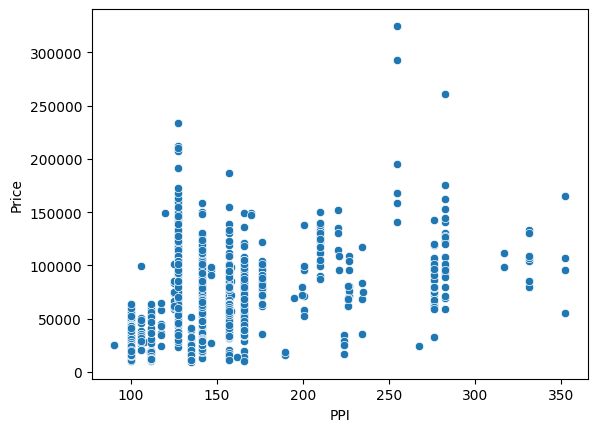

In [32]:
sns.scatterplot(x=df['PPI'], y = df['Price'])

In [33]:
df['ScreenResolution'] = df['ScreenResolution'].str.extract("([0-9]+x[0-9]+)")[0]

In [34]:
df = df.drop(columns=['X_res', 'Y_res','Inches'])

In [35]:
df['Ram'] = df['Ram'].str.replace(r"[A-Z]+","").astype(int)

<AxesSubplot: xlabel='Ram', ylabel='Price'>

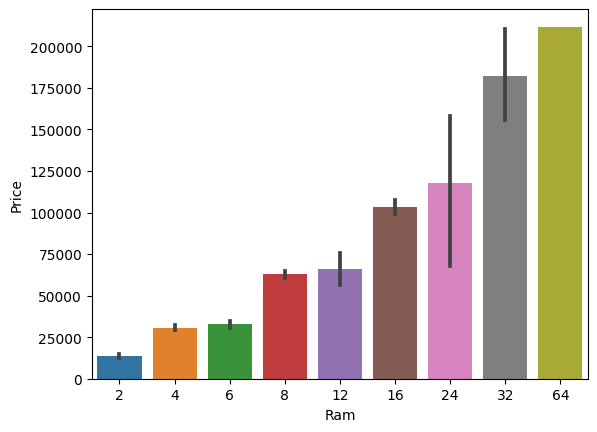

In [36]:
sns.barplot(x=df['Ram'], y=df['Price'])

In [37]:
df['Weight'] = df['Weight'].str.replace(r'[a-z]',"").astype(float)

<AxesSubplot: xlabel='Weight', ylabel='Price'>

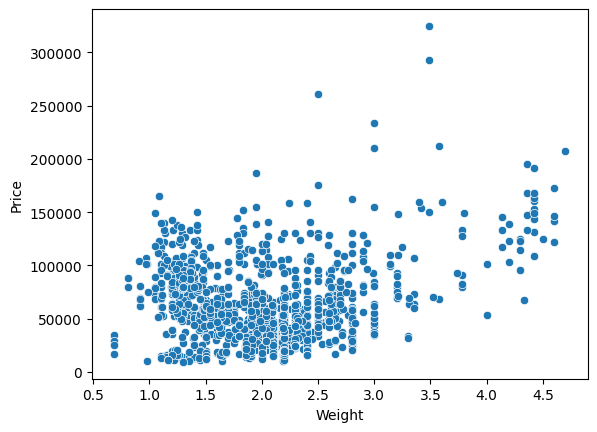

In [38]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

In [39]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,PPI
236,Acer,Notebook,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.10,20779.20,0,0,100.454670
1200,Dell,Notebook,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,AMD Radeon R7 M440,Windows 10,2.30,26586.72,0,0,100.454670
1271,Lenovo,2 in 1 Convertible,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,276.053530
304,Asus,Gaming,1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,67399.20,0,0,141.211998
1134,Acer,Notebook,1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23,32820.48,0,0,141.211998


In [40]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
IPS_Display    0.252208
Touchscreen    0.191226
PPI            0.473487
Name: Price, dtype: float64

In [41]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

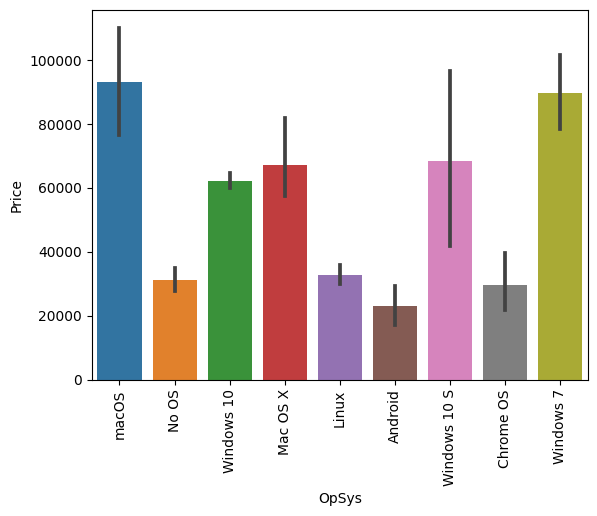

In [42]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')

In [43]:
df['OpSys'].str.split().str[0].value_counts().to_dict()

{'Windows': 1125,
 'No': 66,
 'Linux': 62,
 'Chrome': 27,
 'macOS': 13,
 'Mac': 8,
 'Android': 2}

In [44]:
df['OpSys'].str.split().str[0].replace({'No': 'Linux/Other/No OS',
                                         'Linux': 'Linux/Other/No OS',
                                         'Chrome': 'Linux/Other/No OS',                                         
                                         'Mac': 'macOS',
                                         'Android': 'Linux/Other/No OS'}).value_counts()

Windows              1125
Linux/Other/No OS     157
macOS                  21
Name: OpSys, dtype: int64

In [45]:
df['OpSys'] = df['OpSys'].str.split().str[0].replace({'No': 'Linux/Other/No OS',
                                                     'Linux': 'Linux/Other/No OS',
                                                     'Chrome': 'Linux/Other/No OS',                                         
                                                     'Mac': 'macOS',
                                                     'Android': 'Linux/Other/No OS'})

In [46]:
df['OpSys'].value_counts()

Windows              1125
Linux/Other/No OS     157
macOS                  21
Name: OpSys, dtype: int64

<AxesSubplot: xlabel='OpSys', ylabel='Price'>

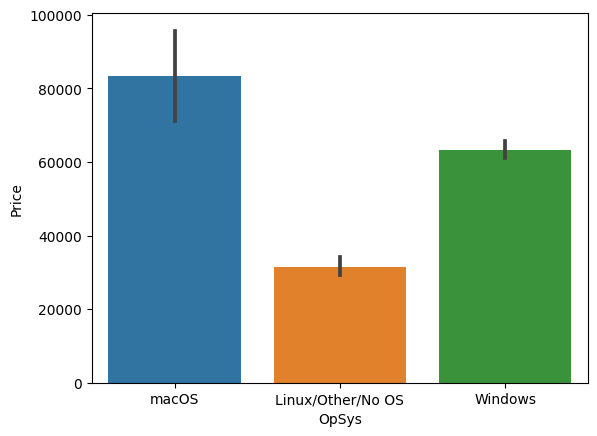

In [47]:
sns.barplot(x=df['OpSys'], y=df['Price'])

In [48]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
IPS_Display    0.252208
Touchscreen    0.191226
PPI            0.473487
Name: Price, dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   ScreenResolution  1303 non-null   object 
 3   Cpu               1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  IPS_Display       1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  PPI               1303 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 127.4+ KB


In [50]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,PPI
180,Dell,Notebook,1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Linux/Other/No OS,2.02,55890.7200,0,0,141.211998
50,Lenovo,2 in 1 Convertible,1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Linux/Other/No OS,0.69,16996.3200,1,1,224.173809
1102,Acer,Notebook,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,4,16GB SSD,Intel HD Graphics,Linux/Other/No OS,2.20,11135.5200,0,0,100.454670
673,Lenovo,Notebook,1366x768,AMD E-Series E2-9000 2.2GHz,4,128GB SSD,AMD Radeon R2 Graphics,Windows,2.20,18594.7200,0,0,100.454670
413,Acer,2 in 1 Convertible,1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows,1.60,42038.4528,1,1,165.632118


In [51]:
df.loc[df['Cpu'].str.contains('Intel')]['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1240, dtype: object

In [52]:
df.loc[df['Cpu'].str.contains('Intel Core')]['Cpu']

0             Intel Core i5 2.3GHz
1             Intel Core i5 1.8GHz
2       Intel Core i5 7200U 2.5GHz
3             Intel Core i7 2.7GHz
4             Intel Core i5 3.1GHz
                   ...            
1295    Intel Core i7 7500U 2.7GHz
1297    Intel Core i7 6500U 2.5GHz
1298    Intel Core i7 6500U 2.5GHz
1299    Intel Core i7 6500U 2.5GHz
1301    Intel Core i7 6500U 2.5GHz
Name: Cpu, Length: 1105, dtype: object

In [53]:
df.loc[df['Cpu'].str.contains('AMD')]['Cpu']

5            AMD A9-Series 9420 3GHz
22      AMD E-Series E2-9000e 1.5GHz
31       AMD E-Series E2-6110 1.5GHz
32         AMD A6-Series 9220 2.5GHz
47               AMD Ryzen 1700 3GHz
                    ...             
1240     AMD A12-Series 9720P 3.6GHz
1251       AMD A6-Series 9220 2.5GHz
1266       AMD A9-Series 9410 2.9GHz
1280       AMD A9-Series 9410 2.9GHz
1294       AMD A9-Series 9410 2.9GHz
Name: Cpu, Length: 62, dtype: object

In [54]:
df = df.loc[df['Cpu'].str.contains('AMD|Intel')]

In [55]:
df['Cpu'].str.split().str[:3].str.join(" ").value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A6-Series A6-9220         2
AMD A10-Series 9600P          2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [56]:
df['Cpu'] = df['Cpu'].str.split().str[:3].str.join(" ")

In [57]:
df['Cpu'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A6-Series A6-9220         2
AMD A10-Series 9600P          2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [58]:
def fetch_processor(text):
    if 'AMD' in text:
        return "AMD Processor"
    elif 'Intel Celeron' in text:
        return 'Intel Celeron Processor'
    elif text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
        return text
    else:
        return 'Intel Other Processor'

In [59]:
df['Cpu'].apply(fetch_processor).value_counts()

Intel Core i7              527
Intel Core i5              423
Intel Core i3              136
Intel Celeron Processor     88
Intel Other Processor       66
AMD Processor               62
Name: Cpu, dtype: int64

In [60]:
df['Cpu'] = df['Cpu'].apply(fetch_processor)

In [61]:
df['Cpu'].value_counts()

Intel Core i7              527
Intel Core i5              423
Intel Core i3              136
Intel Celeron Processor     88
Intel Other Processor       66
AMD Processor               62
Name: Cpu, dtype: int64

In [62]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,PPI
806,Toshiba,Notebook,1366x768,Intel Core i5,4,500GB HDD,Intel HD Graphics 520,Windows,2.10,41558.4000,0,0,100.454670
786,MSI,Gaming,1920x1080,Intel Core i5,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows,2.20,58021.9200,0,0,141.211998
1090,Dell,Notebook,1366x768,Intel Other Processor,4,500GB HDD,Intel HD Graphics,Linux/Other/No OS,2.20,20965.1472,0,0,100.454670
960,Toshiba,Notebook,1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 520,Windows,1.20,81784.8000,0,0,165.632118
265,Dell,2 in 1 Convertible,1920x1080,Intel Core i5,8,256GB SSD,Intel UHD Graphics 620,Windows,2.67,42570.7200,0,1,141.211998


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Intel Other Processor'),
  Text(5, 0, 'Intel Celeron Processor')])

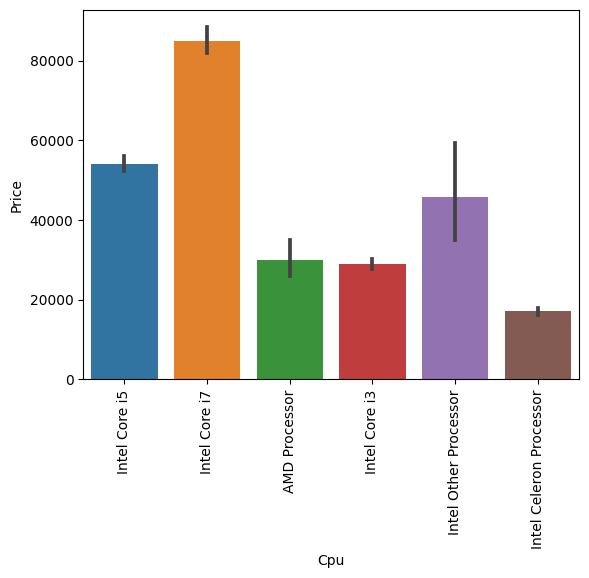

In [63]:
sns.barplot(x = df['Cpu'], y = df['Price'])
plt.xticks(rotation='vertical')

In [64]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [65]:
df['Memory'].str.findall(r'([0-9.]+[GTB]+ SSD)')

0       [128GB SSD]
1                []
2       [256GB SSD]
3       [512GB SSD]
4       [256GB SSD]
           ...     
1298    [128GB SSD]
1299    [512GB SSD]
1300             []
1301             []
1302             []
Name: Memory, Length: 1302, dtype: object

In [66]:
list1 = ['128GB SSD','128GB SSD']

def fetch_ssd(list1):
    import regex
    if len(list1)==1:
        return regex.findall(r'[0-9]+', list1[0])[0]
    elif len(list1)>=2:
        sum1=0
        for i in range(len(list1)):
            sum1 += int(regex.findall(r'[0-9]+', list1[i])[0])
        return sum1
    
fetch_ssd(list1)

256

In [67]:
df['Memory'].str.findall(r'([0-9.]+[GTB]+ SSD)').apply(fetch_ssd).value_counts()

256     498
128     172
512     136
1        16
32        6
180       5
16        3
512       2
64        1
1024      1
768       1
240       1
8         1
Name: Memory, dtype: int64

In [68]:
df['SSD'] = df['Memory'].str.findall(r'([0-9.]+[GTB]+ SSD)').apply(fetch_ssd).fillna(0).astype(int)

In [69]:
df['SSD'].replace({1:1024}).value_counts()

256     498
0       459
128     172
512     138
1024     17
32        6
180       5
16        3
64        1
768       1
240       1
8         1
Name: SSD, dtype: int64

In [70]:
df['SSD'].replace({1:1024}, inplace=True)

In [71]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,PPI,SSD
624,HP,Notebook,1366x768,Intel Core i5,4,500GB HDD,Intel HD Graphics 520,Windows,1.88,49656.96,0,0,100.454670,0
254,Acer,Notebook,1920x1080,Intel Core i3,4,256GB SSD,Nvidia GeForce MX130,Windows,3.00,37402.56,1,0,127.335675,256
563,Lenovo,Notebook,1920x1080,Intel Core i7,8,256GB SSD,Nvidia Quadro M620M,Windows,3.40,159786.72,1,0,127.335675,256
1102,Acer,Notebook,1366x768,Intel Celeron Processor,4,16GB SSD,Intel HD Graphics,Linux/Other/No OS,2.20,11135.52,0,0,100.454670,16
105,HP,Notebook,1920x1080,Intel Core i5,6,256GB SSD,Nvidia GeForce 940MX,Windows,1.58,35111.52,1,0,157.350512,256


In [72]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [73]:
df['Memory'].str.findall(r'([0-9.]+[GTB]+ HDD)').value_counts()

[]                    726
[1TB HDD]             407
[500GB HDD]           134
[2TB HDD]              31
[1TB HDD, 1TB HDD]      1
[32GB HDD]              1
[128GB HDD]             1
[1.0TB HDD]             1
Name: Memory, dtype: int64

In [74]:
def fetch_hdd(list1):
    import regex
    if len(list1)==1:
        return regex.findall(r'[0-9]+', list1[0])[0]
    elif len(list1)>=2:
        sum1=0
        for i in range(len(list1)):
            sum1 += int(regex.findall(r'[0-9]+', list1[i])[0])
        return sum1

In [75]:
df['Memory'].str.findall(r'([0-9.]+[GTB]+ HDD)').apply(fetch_hdd).value_counts()

1      408
500    134
2       31
2        1
32       1
128      1
Name: Memory, dtype: int64

In [76]:
df['HDD'] = df['Memory'].str.findall(r'([0-9.]+[GTB]+ HDD)').apply(fetch_hdd).fillna(0).astype(float)

In [77]:
df['HDD'].value_counts()

0.0      726
1.0      408
500.0    134
2.0       32
32.0       1
128.0      1
Name: HDD, dtype: int64

In [78]:
df['HDD'].replace({1.0:1024, 2.0:2048}).astype(int).value_counts()

0       726
1024    408
500     134
2048     32
32        1
128       1
Name: HDD, dtype: int64

In [79]:
df['HDD'] = df['HDD'].replace({1.0:1024, 2.0:2048}).astype(int)

In [80]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,PPI,SSD,HDD
856,Asus,Notebook,1366x768,Intel Other Processor,4,1TB HDD,Intel HD Graphics 505,Windows,2.00,23922.720,0,0,100.454670,0,1024
355,Dell,Notebook,1920x1080,Intel Core i7,8,128GB SSD + 2TB HDD,AMD Radeon 530,Windows,2.02,51729.552,0,0,141.211998,128,2048
951,Dell,Ultrabook,1920x1080,Intel Core i7,8,256GB SSD,Intel HD Graphics 620,Windows,1.36,94572.000,0,0,157.350512,256,0
725,Lenovo,Notebook,1366x768,Intel Core i5,4,1TB HDD,Intel HD Graphics 620,Linux/Other/No OS,1.90,26101.872,0,0,100.454670,0,1024
1079,HP,Notebook,1920x1080,Intel Core i5,4,500GB HDD,Intel HD Graphics 520,Windows,2.31,50083.200,0,0,141.211998,0,500


In [81]:
df.loc[(df['SSD']==0) & (df['HDD']==0)]['Memory'].value_counts()

32GB Flash Storage     37
64GB Flash Storage     15
1.0TB Hybrid            9
256GB Flash Storage     8
16GB Flash Storage      7
128GB Flash Storage     4
512GB Flash Storage     2
508GB Hybrid            1
Name: Memory, dtype: int64

In [82]:
df.loc[df['Memory'].str.contains(r'Flash|Hybrid')]['Memory'].value_counts()

32GB Flash Storage               37
64GB Flash Storage               15
1.0TB Hybrid                      9
256GB Flash Storage               8
16GB Flash Storage                7
128GB Flash Storage               4
512GB Flash Storage               2
64GB Flash Storage +  1TB HDD     1
508GB Hybrid                      1
512GB SSD +  1.0TB Hybrid         1
256GB SSD +  1.0TB Hybrid         1
Name: Memory, dtype: int64

In [83]:
df = df.loc[~df['Memory'].str.contains(r'64GB Flash Storage +')]

In [84]:
df['Memory'].str.findall(r"[0-9.]+[TGB]+ Flash Storage|[0-9.]+[TGB]+ Hybrid").value_counts()

[]                       1216
[32GB Flash Storage]       37
[64GB Flash Storage]       15
[1.0TB Hybrid]             11
[256GB Flash Storage]       8
[16GB Flash Storage]        7
[128GB Flash Storage]       4
[512GB Flash Storage]       2
[508GB Hybrid]              1
Name: Memory, dtype: int64

In [85]:
df['Memory'].str.findall(r"[0-9.]+[TGB]+ Flash Storage|[0-9.]+[TGB]+ Hybrid").str[0].str.extract(r"([0-9.]+)").value_counts()

32     37
64     15
1.0    11
256     8
16      7
128     4
512     2
508     1
dtype: int64

In [86]:
df['Hybrid']=df['Memory'].str.findall(r"[0-9.]+[TGB]+ Flash Storage|[0-9.]+[TGB]+ Hybrid").str[0].str.extract(r"([0-9.]+)").fillna(0).astype(float)

In [87]:
df['Hybrid'] = df['Hybrid'].replace({1.0:1024}).astype(int)

In [88]:
df['Hybrid'] .value_counts()

0       1216
32        37
64        15
1024      11
256        8
16         7
128        4
512        2
508        1
Name: Hybrid, dtype: int64

In [89]:
df

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,PPI,SSD,HDD,Hybrid
0,Apple,Ultrabook,2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,128,0,0
1,Apple,Ultrabook,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,0,128
2,HP,Notebook,1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,Linux/Other/No OS,1.86,30636.0000,0,0,141.211998,256,0,0
3,Apple,Ultrabook,2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,512,0,0
4,Apple,Ultrabook,2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,1920x1080,Intel Core i7,4,128GB SSD,Intel HD Graphics 520,Windows,1.80,33992.6400,1,1,157.350512,128,0,0
1299,Lenovo,2 in 1 Convertible,3200x1800,Intel Core i7,16,512GB SSD,Intel HD Graphics 520,Windows,1.30,79866.7200,1,1,276.053530,512,0,0
1300,Lenovo,Notebook,1366x768,Intel Celeron Processor,2,64GB Flash Storage,Intel HD Graphics,Windows,1.50,12201.1200,0,0,111.935204,0,0,64
1301,HP,Notebook,1366x768,Intel Core i7,6,1TB HDD,AMD Radeon R5 M330,Windows,2.19,40705.9200,0,0,100.454670,0,1024,0


In [90]:
df['HDD'] = df['HDD']+df["Hybrid"]

In [91]:
df = df.drop(columns=['Memory', 'Hybrid'])

In [92]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,PPI,SSD,HDD
994,Dell,2 in 1 Convertible,1920x1080,Intel Core i5,8,Intel HD Graphics 620,Windows,1.68,47365.9200,0,1,165.632118,256,0
311,Dell,Ultrabook,3840x2160,Intel Core i7,16,Intel UHD Graphics 620,Windows,1.21,133146.7200,1,1,331.264236,1024,0
579,Dell,Notebook,1920x1080,Intel Core i7,8,AMD Radeon R5 M430,Linux/Other/No OS,2.20,39907.2528,0,0,141.211998,256,0
29,HP,Notebook,1920x1080,Intel Core i5,8,Nvidia GeForce 930MX,Windows,2.50,47738.8800,0,0,127.335675,0,1024
1091,HP,Notebook,1366x768,Intel Core i3,4,Intel HD Graphics 520,Linux/Other/No OS,1.86,18434.3472,0,0,100.454670,0,1024


In [93]:
df.corr()["Price"]

Ram            0.743421
Weight         0.209724
Price          1.000000
IPS_Display    0.254104
Touchscreen    0.193441
PPI            0.475773
SSD            0.672124
HDD           -0.097743
Name: Price, dtype: float64

In [94]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, Length: 109, dtype: int64

In [95]:
df['Gpu'].str.split().str[0].value_counts()

Intel     722
Nvidia    399
AMD       180
Name: Gpu, dtype: int64

In [96]:
df['Gpu'] = df['Gpu'].str.split().str[0]

In [97]:
df['Gpu'].value_counts()

Intel     722
Nvidia    399
AMD       180
Name: Gpu, dtype: int64

<AxesSubplot: xlabel='Gpu', ylabel='Price'>

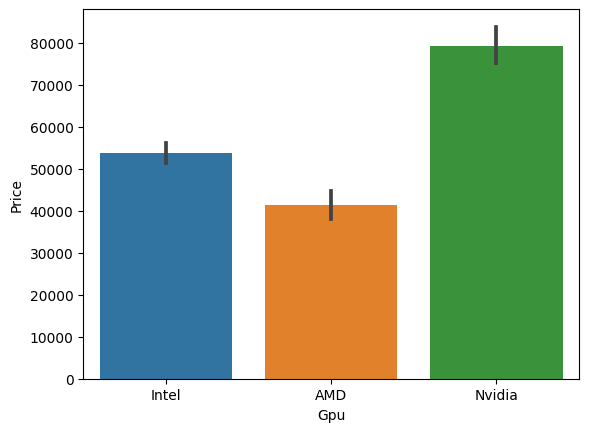

In [98]:
sns.barplot(x=df['Gpu'], y=df['Price'])

In [99]:
df.corr()['Price']

Ram            0.743421
Weight         0.209724
Price          1.000000
IPS_Display    0.254104
Touchscreen    0.193441
PPI            0.475773
SSD            0.672124
HDD           -0.097743
Name: Price, dtype: float64

In [100]:
df['SSD'].value_counts()

256     498
0       458
128     172
512     138
1024     17
32        6
180       5
16        3
64        1
768       1
240       1
8         1
Name: SSD, dtype: int64

In [101]:
df['SSD'].replace({240:256}, inplace=True)

In [102]:
df['HDD'].replace({500:512, 508:512}).value_counts()

0       641
1024    418
512     137
32       38
2048     32
64       15
256       8
16        7
128       5
Name: HDD, dtype: int64

In [103]:
df['HDD'].replace({500:512, 508:512}, inplace=True)

In [104]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS_Display,Touchscreen,PPI,SSD,HDD
1134,Acer,Notebook,1920x1080,Intel Core i5,4,Nvidia,Windows,2.23,32820.48,0,0,141.211998,0,1024
899,Dell,Notebook,1920x1080,Intel Core i5,8,Intel,Windows,1.90,49816.80,0,0,141.211998,0,512
524,Dell,Notebook,1920x1080,Intel Core i5,8,AMD,Linux/Other/No OS,2.80,47365.92,1,0,127.335675,128,1024
929,HP,Notebook,1366x768,Intel Core i5,4,Intel,Windows,1.95,61218.72,0,0,111.935204,0,512
910,Dell,Notebook,1920x1080,Intel Core i5,8,Intel,Windows,1.60,64202.40,0,0,157.350512,256,0


In [105]:
df.corr()['Price']

Ram            0.743421
Weight         0.209724
Price          1.000000
IPS_Display    0.254104
Touchscreen    0.193441
PPI            0.475773
SSD            0.672294
HDD           -0.099335
Name: Price, dtype: float64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1301 non-null   object 
 1   TypeName          1301 non-null   object 
 2   ScreenResolution  1301 non-null   object 
 3   Cpu               1301 non-null   object 
 4   Ram               1301 non-null   int32  
 5   Gpu               1301 non-null   object 
 6   OpSys             1301 non-null   object 
 7   Weight            1301 non-null   float64
 8   Price             1301 non-null   float64
 9   IPS_Display       1301 non-null   int64  
 10  Touchscreen       1301 non-null   int64  
 11  PPI               1301 non-null   float64
 12  SSD               1301 non-null   int32  
 13  HDD               1301 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(6)
memory usage: 137.2+ KB


In [107]:
df.describe()

,Ram,Weight,Price,IPS_Display,Touchscreen,PPI,SSD,HDD
count,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000
mean,8.385857,2.039270,59853.472215,0.279785,0.146810,146.572614,184.322829,437.116065
std,5.087110,0.665509,37243.361921,0.449066,0.354053,43.085321,188.279090,526.645345
min,2.000000,0.690000,9270.720000,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,52054.560000,0.000000,0.000000,141.211998,256.000000,32.000000
75%,8.000000,2.300000,79215.105600,1.000000,0.000000,157.350512,256.000000,1024.000000
max,64.000000,4.700000,324954.720000,1.000000,1.000000,352.465147,1024.000000,2048.000000


In [108]:
df.isna().sum()

Company             0
TypeName            0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price               0
IPS_Display         0
Touchscreen         0
PPI                 0
SSD                 0
HDD                 0
dtype: int64

In [109]:
df['IPS_Display'].replace({0:'no', 1:'yes'},inplace = True)

In [110]:
df['Touchscreen'].replace({0:'no', 1:'yes'},inplace = True)

In [111]:
df.to_csv(r'C:\Users\ramma\OneDrive\My_Data\Velocity_Data_Science\Project\Laptop_Price_Predictor\csv_files\cleaned_laptop_data.csv', index=False)

## Model Training

In [112]:
x = df.drop(['Price', 'ScreenResolution'], axis=1)
y = np.log(df['Price'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=108)

In [113]:
numeric_preprocessor =  Pipeline(steps=[('scaler', MinMaxScaler())])
numeric_preprocessor

Pipeline(steps=[('scaler', MinMaxScaler())])

In [114]:
categorical_preprocessor = Pipeline(
                    steps=[('nominal', OneHotEncoder(sparse= False, drop='if_binary', handle_unknown='ignore'))])
categorical_preprocessor

Pipeline(steps=[('nominal',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse=False))])

In [115]:
col_trans = ColumnTransformer(transformers= 
    [('categorical', categorical_preprocessor, ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'IPS_Display', 'Touchscreen'] ),
         ('numeric', numeric_preprocessor, ['Ram', 'Weight', 'PPI', 'SSD', 'HDD'])],    remainder= 'passthrough')
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 Pipeline(steps=[('nominal',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys',
                                  'IPS_Display', 'Touchscreen']),
                                ('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Ram', 'Weight', 'PPI', 'SSD', 'HDD'])])

## MLFlow

In [116]:
import mlflow
import mlflow.sklearn
# mlflow.autolog()

mlflow.set_experiment("Laptop_Price_Prediction")

2023/01/02 19:45:22 INFO mlflow.tracking.fluent: Experiment with name 'Laptop_Price_Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/ramma/OneDrive/My_Data/Velocity_Data_Science/Project/Laptop_Price_Predictor/artifacts/mlruns/323673283039471413', creation_time=1672668922944, experiment_id='323673283039471413', last_update_time=1672668922944, lifecycle_stage='active', name='Laptop_Price_Prediction', tags={}>

In [117]:
def eval_metrix_dict(actual, predicted):
    MSE = mean_squared_error(actual, predicted)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(actual, predicted)
    R2_SCORE = r2_score(actual, predicted)
    return {"MSE" : MSE, "RMSE" : RMSE, "MAE" : MAE, "R2_SCORE" : R2_SCORE}

In [118]:
with mlflow.start_run():                         # initialize
    model = LinearRegression()
    pipe = make_pipeline(col_trans, model)
    pipe.fit(x_train, y_train)

    y_test_pred = pipe.predict(x_test)

    mlflow.log_metrics(eval_metrix_dict(y_test, y_test_pred))           # save metrics with your names

    mlflow.set_tag("mlflow.runName", "LinearRegression")             # save the name

In [119]:
gscv = GridSearchCV(Lasso(), {'alpha':np.arange(0.001,5, 0.001)}, cv=5)
gscv.fit(col_trans.transform(x_train), y_train)

with mlflow.start_run():                         # initialize
    model = gscv.best_estimator_
    pipe = make_pipeline(col_trans, model)
    pipe.fit(x_train, y_train)

    y_test_pred = pipe.predict(x_test)
    
    mlflow.log_params(gscv.best_params_)
    mlflow.log_metrics(eval_metrix_dict(y_test, y_test_pred))           # save metrics with your names

    mlflow.set_tag("mlflow.runName", "Lasso")             # save the name

In [120]:
gscv = GridSearchCV(Ridge(), {'alpha':np.arange(0.01, 10, 0.01)}, cv=5)
gscv.fit(col_trans.transform(x_train), y_train)

with mlflow.start_run():                         # initialize
    model = gscv.best_estimator_
    pipe = make_pipeline(col_trans, model)
    pipe.fit(x_train, y_train)

    y_test_pred = pipe.predict(x_test)
    
    mlflow.log_params(gscv.best_params_)
    mlflow.log_metrics(eval_metrix_dict(y_test, y_test_pred))           # save metrics with your names

    mlflow.set_tag("mlflow.runName", "Ridge")             # save the name

In [121]:
hyperparameters = {'n_neighbors': np.arange(3,21), 'p':[1,2]}
gscv = GridSearchCV(KNeighborsRegressor(), hyperparameters, cv=5)
gscv.fit(col_trans.transform(x_train), y_train)

with mlflow.start_run():                         # initialize
    model = gscv.best_estimator_
    pipe = make_pipeline(col_trans, model)
    pipe.fit(x_train, y_train)

    y_test_pred = pipe.predict(x_test)
    
    mlflow.log_params(gscv.best_params_)
    mlflow.log_metrics(eval_metrix_dict(y_test, y_test_pred))           # save metrics with your names

    mlflow.set_tag("mlflow.runName", "KNeighborsRegressor")             # save the name

In [122]:
with mlflow.start_run():                         # initialize
    model = DecisionTreeRegressor(max_depth=8)
    pipe = make_pipeline(col_trans, model)
    pipe.fit(x_train, y_train)

    y_test_pred = pipe.predict(x_test)
    
    mlflow.log_params({'max_depth' : 8})
    mlflow.log_metrics(eval_metrix_dict(y_test, y_test_pred))           # save metrics with your names

    mlflow.set_tag("mlflow.runName", "DecisionTreeRegressor")             # save the name

## Testing on Single Input

In [124]:
model = Ridge(alpha=0.32)
pipe = make_pipeline(col_trans, model)
pipe.fit(x_train, y_train)

print('TRAIN')
y_pred_train = pipe.predict(x_train)
print('R2 score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print('RMSE', np.sqrt(mean_squared_error(y_train,y_pred_train)))

print()

print('TEST')
y_pred = pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))

TRAIN
R2 score 0.8401284781168739
MAE 0.19249838673091305
RMSE 0.24742520317627828

TEST
R2 score 0.8199781758891628
MAE 0.21474562159312235
RMSE 0.2720891360877477


In [125]:
print('Tota;')
y_pred = pipe.predict(x)
print('R2 score',r2_score(y,y_pred))
print('MAE',mean_absolute_error(y,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y,y_pred)))

Tota;
R2 score 0.8359911106819156
MAE 0.19696151378628324
RMSE 0.25256635475718386


In [134]:
project_data = {'Company' : list(x.groupby('Company').groups.keys()),
                'TypeName' : list(x.groupby('TypeName').groups.keys()),
                'Cpu' : list(x.groupby('Cpu').groups.keys()),
                'Ram' : list(x.groupby('Ram').groups.keys()),
                'Gpu' : list(x.groupby('Gpu').groups.keys()),
                'OpSys' : list(x.groupby('OpSys').groups.keys()),
                'IPS_Display' : list(x.groupby('IPS_Display').groups.keys()),
                'Touchscreen' : list(x.groupby('Touchscreen').groups.keys()),
                'SSD' : list(x.groupby('SSD').groups.keys()),
                'HDD' : list(x.groupby('HDD').groups.keys()),
                'ScreenResolution' : df['ScreenResolution'].sort_values().unique().tolist(),
                'Column_Names' : x.columns.to_list()}
print(project_data)

{'Company': ['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], 'TypeName': ['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation'], 'Cpu': ['AMD Processor', 'Intel Celeron Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7', 'Intel Other Processor'], 'Ram': [2, 4, 6, 8, 12, 16, 24, 32, 64], 'Gpu': ['AMD', 'Intel', 'Nvidia'], 'OpSys': ['Linux/Other/No OS', 'Windows', 'macOS'], 'IPS_Display': ['no', 'yes'], 'Touchscreen': ['no', 'yes'], 'SSD': [0, 8, 16, 32, 64, 128, 180, 256, 512, 768, 1024], 'HDD': [0, 16, 32, 64, 128, 256, 512, 1024, 2048], 'ScreenResolution': ['1366x768', '1440x900', '1600x900', '1920x1080', '1920x1200', '2160x1440', '2256x1504', '2304x1440', '2400x1600', '2560x1440', '2560x1600', '2736x1824', '2880x1800', '3200x1800', '3840x2160'], 'Column_Names': ['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'We

In [136]:
laptop_df[0:1]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [154]:
Company    =                   'Apple'
TypeName    =            'Ultrabook'
Cpu          =      'Intel Core i5'
Ram           =                 8
Gpu           =             'Intel'
OpSys         = 'macOS'
Weight         =             1.37
IPS_Display     =               'yes'
Touchscreen      =             'no'
ScreenResolution  =    '2560x1600'
Screen_Size        =          13.3
SSD                =            128
HDD                 =         0

X_res = int(ScreenResolution.split("x")[0])
Y_res = int(ScreenResolution.split("x")[1])
PPI = np.round(((X_res**2 + Y_res**2)**0.5/Screen_Size),2)

test_df = pd.DataFrame([[Company, TypeName, Cpu, Ram, Gpu, OpSys, Weight,
                   IPS_Display, Touchscreen, PPI, SSD, HDD]], columns=project_data['Column_Names'])

predicted_price = np.exp(pipe.predict(test_df)[0])
predicted_price

87882.02379943618

In [149]:
z = 614
print(df.iloc[[z]]['Price'])

predicted_price = np.exp(pipe.predict(df.iloc[[z]].drop(columns=['Price']))[0])
predicted_price

615    62231.04
Name: Price, dtype: float64


63641.33743885808

In [150]:
json.dump(project_data, open('project_data.json', 'w'), )

In [151]:
pickle.dump(pipe, open('model_pipe.pkl', 'wb'))